# Group 52: Runhan Chen, Jinrui Fang
# DS-GA 1001: Data Analysis Project 1

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv("../Movie_dataAnalysisProject/movieReplicationSet.csv", sep=",")

In [9]:
df.shape

(1097, 477)

In [12]:
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


### 1.Are movies that are more popular (operationalized as having more ratings) rated higher than movies that
are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]

In [40]:
popularity = df.iloc[:,:400].count()
popularity

The Life of David Gale (2003)                 76
Wing Commander (1999)                         71
Django Unchained (2012)                      453
Alien (1979)                                 289
Indiana Jones and the Last Crusade (1989)    463
                                            ... 
Patton (1970)                                 61
Anaconda (1997)                              198
Twister (1996)                               174
MacArthur (1977)                              61
Look Who's Talking (1989)                    108
Length: 400, dtype: int64

In [30]:
# meadian-split of popularity to determine high/low popularity movies
# T-test, need the variance of the two groups be same. If we do not use the median to split the groups, 
# the variance will be different. 
median_split = popularity.median()
median_split

197.5

In [42]:
rating_mean = df.iloc[:,:400].mean()
rating_mean

The Life of David Gale (2003)                2.151316
Wing Commander (1999)                        2.021127
Django Unchained (2012)                      3.153422
Alien (1979)                                 2.707612
Indiana Jones and the Last Crusade (1989)    2.778618
                                               ...   
Patton (1970)                                2.278689
Anaconda (1997)                              2.295455
Twister (1996)                               2.402299
MacArthur (1977)                             2.114754
Look Who's Talking (1989)                    2.337963
Length: 400, dtype: float64

In [52]:
# combine two df
movie_stats = pd.DataFrame({
    'Popularity': popularity,
    'AverageRating': rating_mean
}).reset_index()
movie_stats.head()

,index,Popularity,AverageRating
0,The Life of David Gale (2003),76,2.151316
1,Wing Commander (1999),71,2.021127
2,Django Unchained (2012),453,3.153422
3,Alien (1979),289,2.707612
4,Indiana Jones and the Last Crusade (1989),463,2.778618


In [53]:
# Use the median-split to find the average rating for high popularity movie
high = movie_stats[movie_stats['Popularity'] > median_split]['AverageRating']
high

2      3.153422
3      2.707612
4      2.778618
7      2.899606
9      2.911565
         ...   
390    2.914062
392    2.559045
393    2.618952
394    3.272459
396    2.295455
Name: AverageRating, Length: 200, dtype: float64

In [54]:
# Use the median-split to find the average rating for low popularity movie
low = movie_stats[movie_stats['Popularity'] < median_split]['AverageRating']
low

0      2.151316
1      2.021127
5      2.597656
6      2.365385
8      2.496350
         ...   
391    3.101036
395    2.278689
397    2.402299
398    2.114754
399    2.337963
Name: AverageRating, Length: 200, dtype: float64

In [58]:
from scipy import stats
t, p = stats.ttest_ind(high, low) 
# T-Test, and found P-value < 0.005 (alpha = 0.005 here), 
# it is statistically significant ==> we have reason to conclude that the average rating in two groups has the difference,
# (the observed difference in mean are not due to sampling error)
t, p

(17.7560492698737, 2.2696530276564846e-52)

In [78]:
high.mean() - low.mean() 
# Hence, movies that are more popular 
# (operationalized as having more ratings) are rated higher than movies that are less popular

0.4673930830804105

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
movie_stats['label'] = np.where(movie_stats['Popularity'] > median_split, 'High', 'Low')
movie_stats

,index,Popularity,AverageRating,label
0,The Life of David Gale (2003),76,2.151316,Low
1,Wing Commander (1999),71,2.021127,Low
2,Django Unchained (2012),453,3.153422,High
3,Alien (1979),289,2.707612,High
4,Indiana Jones and the Last Crusade (1989),463,2.778618,High
...,...,...,...,...
395,Patton (1970),61,2.278689,Low
396,Anaconda (1997),198,2.295455,High
397,Twister (1996),174,2.402299,Low
398,MacArthur (1977),61,2.114754,Low


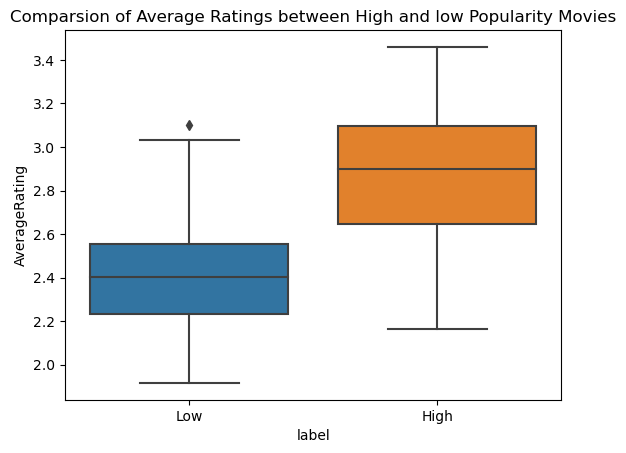

In [77]:
plt.figure()
sns.boxplot(x='label', y='AverageRating', data = movie_stats)
plt.title("Comparsion of Average Ratings between High and low Popularity Movies")
plt.show()

### 2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of
release to contrast movies in terms of whether they are old or new]

In [100]:
# extract the year for each movie
## use str.slice to extract value from the string, and use astype to convert the data type
movies_year = pd.DataFrame({'AverageRating':rating_mean}).reset_index()
movies_year['year']=movies_year['index'].str.slice(-5, -1).astype(int)
movies_year

,index,AverageRating,year
0,The Life of David Gale (2003),2.151316,2003
1,Wing Commander (1999),2.021127,1999
2,Django Unchained (2012),3.153422,2012
3,Alien (1979),2.707612,1979
4,Indiana Jones and the Last Crusade (1989),2.778618,1989
...,...,...,...
395,Patton (1970),2.278689,1970
396,Anaconda (1997),2.295455,1997
397,Twister (1996),2.402299,1996
398,MacArthur (1977),2.114754,1977


In [110]:
# use the median to split the movie into new and old 
year_median = movies_year['year'].median()
movies_year['label'] = np.where(movies_year['year'] > year_median, 'New', 'Old')
movies_year

,index,AverageRating,year,label
0,The Life of David Gale (2003),2.151316,2003,New
1,Wing Commander (1999),2.021127,1999,Old
2,Django Unchained (2012),3.153422,2012,New
3,Alien (1979),2.707612,1979,Old
4,Indiana Jones and the Last Crusade (1989),2.778618,1989,Old
...,...,...,...,...
395,Patton (1970),2.278689,1970,Old
396,Anaconda (1997),2.295455,1997,Old
397,Twister (1996),2.402299,1996,Old
398,MacArthur (1977),2.114754,1977,Old


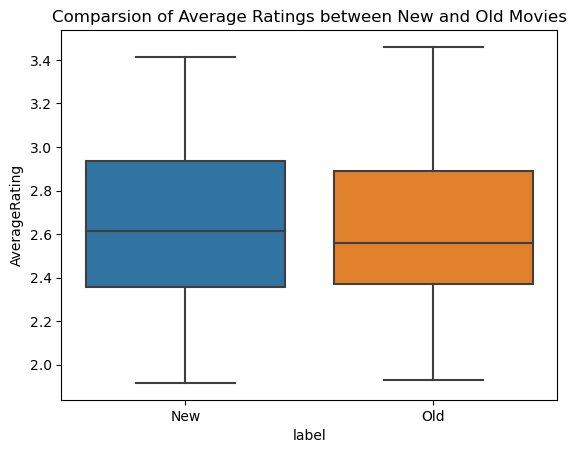

In [105]:
plt.figure()
sns.boxplot(x='label', y='AverageRating', data = movies_year)
plt.title("Comparsion of Average Ratings between New and Old Movies")
plt.show()

In [117]:
new = movies_year[movies_year['label'] == 'New']['AverageRating']
new

0      2.151316
2      3.153422
5      2.597656
8      2.496350
9      2.911565
         ...   
387    3.299754
388    2.198413
389    2.250000
390    2.914062
394    3.272459
Name: AverageRating, Length: 174, dtype: float64

In [121]:
old = movies_year[movies_year['label'] == 'Old']['AverageRating']
old

1      2.021127
3      2.707612
4      2.778618
6      2.365385
7      2.899606
         ...   
395    2.278689
396    2.295455
397    2.402299
398    2.114754
399    2.337963
Name: AverageRating, Length: 226, dtype: float64

In [124]:
# welch's test ==> set equal_var to false, usually used when two sample size are not equal
t, p = stats.ttest_ind(new, old, equal_var =False) 
# P value is larger than the alpha(0.005), it is not statistically significant ==> observed difference due to sampling error
t, p 

(1.1201895621529818, 0.26336409999036803)

In [125]:
# After we split the data by using the median, we found the p value is not statistically significant,
# there is no difference between the movies that are newer and movies that are older

### 3. Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [418]:
# extract data to have two columns: Gender, and Shrek
gender_col = df.columns[474]
movie_gender = df[[gender_col, 'Shrek (2001)']].rename(columns={gender_col: 'Gender', 'Shrek (2001)' : 'Shrek'})
movie_gender['Gender'].value_counts()

1.0    807
2.0    260
3.0      6
Name: Gender, dtype: int64

In [419]:
#  Gender identity (1 = female, 2 = male, 3 = self-described)
# in order to cut down false positives, we decide to compare female and male's rating.
female_ratings_shrek = movie_gender[movie_gender['Gender'] == 1]['Shrek'].dropna()
male_ratings_shrek = movie_gender[movie_gender['Gender'] == 2]['Shrek'].dropna()
t_statistic, p_value = stats.ttest_ind(female_ratings_shrek, male_ratings_shrek, equal_var=False)
print("Welch’s t-statistic:", t_statistic)
print("p-value:", p_value)

Welch’s t-statistic: 1.1558907155973421
p-value: 0.24834907946281018


### 4. What proportion of movies are rated differently by male and female viewers?

In [420]:
# Filter the dataset for male and female participants
male_ratings = df[df[gender_col] == 2].iloc[:, :400]
female_ratings = df[df[gender_col] == 1].iloc[:, :400]

In [421]:
# Initialize a counter for movies with significantly different ratings
count_significantly_different = 0

# Conduct Welch's t-tests for each movie
for movie in male_ratings.columns:
    t_stat, p_value = stats.ttest_ind(male_ratings[movie], female_ratings[movie], equal_var=False, nan_policy='omit')
    if p_value < 0.005:
        count_significantly_different += 1

# Calculate the proportion of movies rated differently
proportion_different = count_significantly_different / 400

print("Proportion of movies rated differently by male and female viewers:", proportion_different)
print(count_significantly_different)

Proportion of movies rated differently by male and female viewers: 0.1125
45


### 5.Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [181]:
movies_only_child = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1]['The Lion King (1994)']
movies_siblings = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0]['The Lion King (1994)']

In [182]:
t, p = stats.ttest_ind(movies_only_child.dropna(), movies_siblings.dropna(), equal_var =False)
t, p

(-1.884028409511613, 0.06102886373552747)

In [147]:
movies_only_child.mean() - movies_siblings.mean() 
# it is not statistically significant, because p-value is larger than alpha which is 0.005

-0.1342766436813001

### 6.What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [416]:
significant_difference = 0
for movie in df.columns[:400]:
    movies_only_child = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1][movie]
    movies_siblings = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0][movie]
    # Welch's test to find if there is the statistically significant difference
    t, p = stats.ttest_ind(movies_only_child.dropna(), movies_siblings.dropna(), equal_var =False)
    if p < 0.005:
        print(movie)
        significant_difference += 1
proportion = significant_difference / 400 
significant_difference, proportion 

Billy Madison (1995)
The Blue Lagoon (1980)
Happy Gilmore (1996)
Star Wars: Episode VI - The Return of the Jedi (1983)
FeardotCom (2002)
Captain America: Civil War (2016)


(6, 0.015)

### 7.Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [195]:
movies_social = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]['The Wolf of Wall Street (2013)']
movies_alone = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]['The Wolf of Wall Street (2013)']

In [199]:
t, p = stats.ttest_ind(movies_social.dropna(), movies_alone.dropna(), equal_var =False)
t, p

(-1.5513309472217705, 0.12139103950020742)

In [202]:
movies_social.shape, movies_alone.shape

((462,), (610,))

### 8. What proportion of movies exhibit such a “social watching” effect?

In [415]:
significant_difference = 0
for movie in df.columns[:400]:
    movies_social = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0][movie]
    movies_alone = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1][movie]
    # Welch's test to find if there is the statistically significant difference
    t, p = stats.ttest_ind(movies_social.dropna(), movies_alone.dropna(), equal_var =False)
    if p < 0.005:
        print(movie)
        significant_difference += 1
proportion = significant_difference / 400 
significant_difference, proportion

The Silence of the Lambs (1991)
North (1994)
Shrek 2 (2004)
Ghostbusters (2016)
Spider-Man (2002)
Donnie Darko (2001)


(6, 0.015)

### 9.Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

In [233]:
movies_homeAlone = df['Home Alone (1990)'].dropna()
movies_findingNemo = df['Finding Nemo (2003)'].dropna()
t, p = stats.ttest_ind(movies_homeAlone.dropna(), movies_findingNemo.dropna(), equal_var =False)
t, p

(-6.494570458011648, 1.0891130124203821e-10)

Text(0, 0.5, 'Number of Ratings')

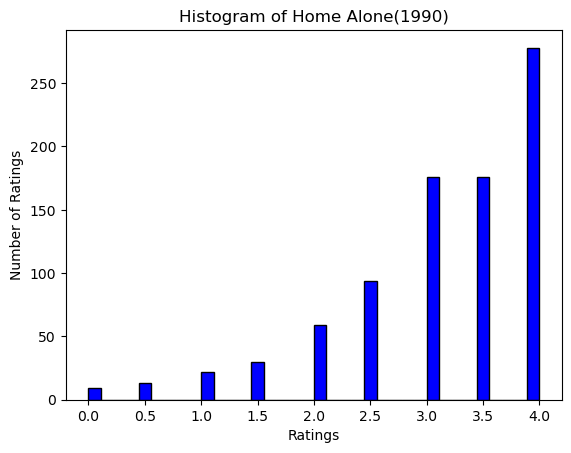

In [231]:
plt.hist(movies_homeAlone, color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.title('Histogram of Home Alone(1990)')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')

Text(0, 0.5, 'Number of Ratings')

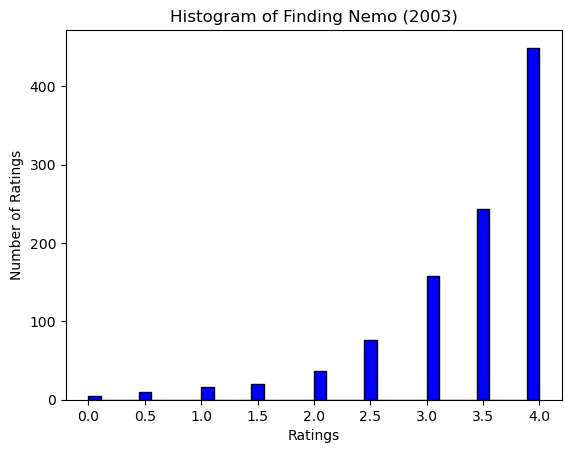

In [422]:
plt.hist(movies_findingNemo, color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.title('Histogram of Finding Nemo (2003)')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')

In [428]:
home_alone = df[['Home Alone (1990)']].dropna()
finding_nemo = df[['Finding Nemo (2003)']].dropna()

from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

home_alone = home_alone[~np.isnan(home_alone)]
finding_nemo = finding_nemo[~np.isnan(finding_nemo)]
home_alone = np.array(home_alone, dtype=float)
finding_nemo = np.array(finding_nemo, dtype=float)

# Assuming ratings_home_alone and ratings_finding_nemo are your data arrays
ks_statistic, p_value = ks_2samp(home_alone, finding_nemo)

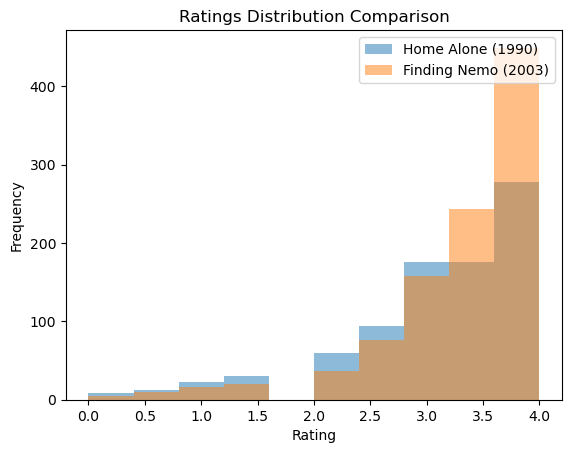

KS Statistic: 0.15269080020897632
P-value: 6.379397182836346e-10


In [429]:
# Visual Comparison
plt.hist(home_alone, alpha=0.5, label='Home Alone (1990)')
plt.hist(finding_nemo, alpha=0.5, label='Finding Nemo (2003)')
plt.legend(loc='upper right')
plt.title('Ratings Distribution Comparison')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Output the KS test results
print('KS Statistic:', ks_statistic)
print('P-value:', p_value)

### 10. There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]


In [394]:
movies_list = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 
               'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']
movie_dict = {}

for name in movies_list:
    data = df.filter(regex=name)
    mean = []
    for group in data.columns:
        mean.append(data[group].mean())
        #print(group, data[group].mean())
    print("The standard deviation for", name, np.std(mean))
    movie_dict[name] = np.std(mean)
    print()

The standard deviation for Star Wars 0.2804192235674831

The standard deviation for Harry Potter 0.022214004606203052

The standard deviation for The Matrix 0.18768231174087024

The standard deviation for Indiana Jones 0.1552133770990197

The standard deviation for Jurassic Park 0.14868262907220497

The standard deviation for Pirates of the Caribbean 0.09025196095240534

The standard deviation for Toy Story 0.06399197424572903

The standard deviation for Batman 0.36876536653194386



In [412]:
mean_std = np.mean(list(movie_dict.values()))
mean_std

0.16465260597698242

Text(0.5, 1.0, 'Histogram of Standard Deviation of Franchises')

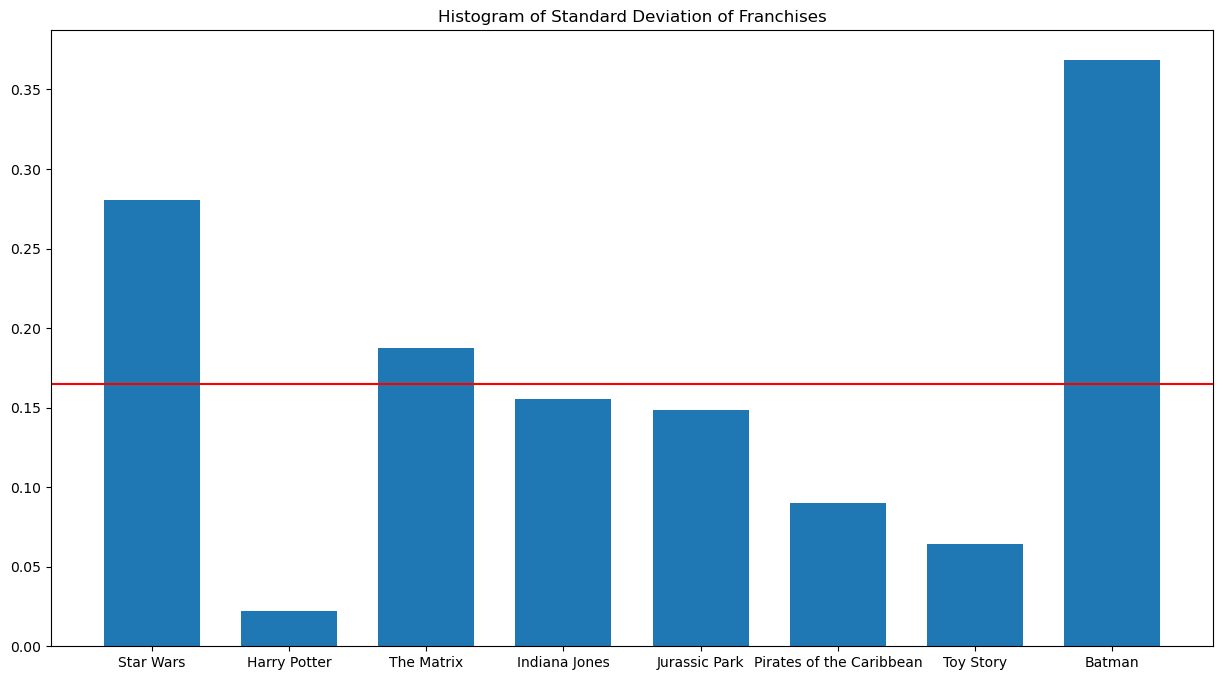

In [414]:
plt.figure(figsize = (15, 8))
plt.axhline(mean_std, color = 'r')
plt.bar(movie_dict.keys(), movie_dict.values(), width = 0.7)
plt.title('Histogram of Standard Deviation of Franchises')

### 11.Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score]

### What portion of movies that if the audience feel like the things on the screen are happening to me, the feeling for more and less, there is a difference in average ratings between the two groups.

In [379]:
median_split = df['When watching a movie I feel like the things on the screen are happening to me'].median()

In [417]:
significant_difference = 0
for movie in df.columns[:400]:
    movies_more = df[df['When watching a movie I feel like the things on the screen are happening to me'] > median_split][movie]
    movies_alone = df[df['When watching a movie I feel like the things on the screen are happening to me'] < median_split][movie]
    # Welch's test to find if there is the statistically significant difference
    t, p = stats.ttest_ind(movies_more.dropna(), movies_alone.dropna(), equal_var =False)
    if p < 0.005:
        significant_difference += 1
        print(movie)
# There are 9% of movies in 400 that if you feel like the things on the screen are happening to you, they will rate higher
# than others. 
proportion = significant_difference / 400 
proportion, significant_difference

The Bridges of Madison County (1995)
Batman & Robin (1997)
Shrek 2 (2004)
Barb Wire (1996)
Tropic of Cancer (1970)
Ghostbusters (2016)
Cheaper by the Dozen (2003)
The Vow (2012)
Batman (1989)
Tarzan (1999)
Baby Geniuses (1999)
Pirates of the Caribbean: At World's End (2007)
Uptown Girls (2003)
Austin Powers: The Spy Who Shagged Me (1999)
Air Force One (1997)
Daredevil (2003)
Bruce Almighty (2003)
Bad Teacher (2011)
Cable Guy (1996)
Ice Age (2002)
There's Something About Mary (1998)
Zoolander (2001)
Rocky (1976)
Home Alone (1990)
The Hulk (2003)
Titanic (1997)
Charlie's Angels (2000)
American Psycho (2000)
Bend it Like Beckham (2002)
E.T. The Extra-Terrestrial (1982)
Aladdin (1992)
One Flew Over the Cuckoo's Nest (1975)
My Best Friend's Wedding (1997)
Jurassic Park (1993)
Inception (2010)
Fatal Attraction (1987)


(0.09, 36)